# РГР №1
##### Васильев Василий 
##### Вариант 2

## Выборка A
    


##### <font color='42aaff'>1) Указать максимальный и минимальный элементы выборки, найти размах выборки</font>

Создадим массив с исходными данными, преобразуем его в одномерный и создадим DataFrame. С помощью функций max() и min() найдем максимальное и минимальное значения выборки. Размах выборки найдем по формуле:
$$ \text{Размах} = \text{max(data)} - \text{min(data)} $$
    

In [2527]:
import pandas as pd
from IPython.display import display, Markdown

data = [
    [3, 7, 4, 6, 1, 4, 2, 4, 6, 5, 3, 2, 9, 0, 5, 6, 7, 7, 3, 1],
    [5, 5, 4, 2, 6, 2, 1, 5, 3, 3, 1, 5, 6, 4, 4, 3, 4, 1, 5, 5],
    [3, 4, 3, 7, 4, 5, 6, 7, 5, 2, 4, 6, 6, 7, 7, 3, 5, 4, 4, 3],
    [5, 5, 7, 6, 6, 1]
]

flat_data = [item for sublist in data for item in sublist]
df = pd.DataFrame(flat_data, columns=['Элемент выборки'])

max_value = df['Элемент выборки'].max()
min_value = df['Элемент выборки'].min()
range_value = max_value - min_value

display(Markdown(f"""Максимальное значение: {max_value}  
Минимальное значение: {min_value}  
Размах: {range_value}"""))

Максимальное значение: 9  
Минимальное значение: 0  
Размах: 9


#### <font color='42aaff'> 2) Построить статистический ряд и начертить полигон ряда</font>

Для создания статистического ряда вычислим частоты появления $N$ для каждой из вариант $x$. Для этого применим операции из pandas:
1) value_counts() c Подсчитывает частоты каждого уникального значения в столбце
2) sort_index() — Сортирует индексы (в нашем случае уникальные значения) в порядке возрастания
3) reset_index() — Сбрасывает индексы, преобразуя их в обычный столбец, чтобы получить таблицу с двумя столбцами (уникальные значения и их частоты)

In [2528]:
frequency_table = df['Элемент выборки'].value_counts().sort_index().reset_index()
frequency_table.columns = ['Варианта', 'Частота']
display(frequency_table.style.hide(axis="index"))

Варианта,Частота
0,1
1,6
2,5
3,10
4,12
5,13
6,10
7,8
9,1


Построим полигон ряда на основе статистического ряда (на оси oX варианты, на оси oY частоты)

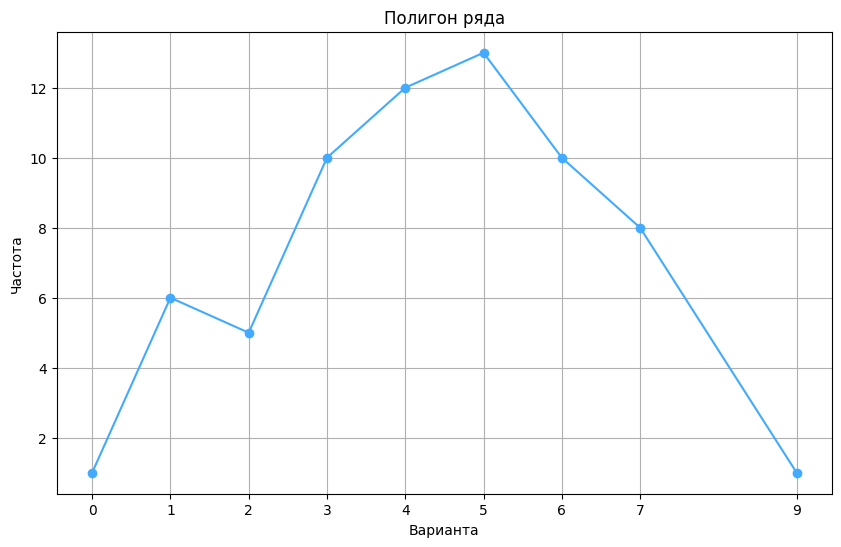

In [2529]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(frequency_table['Варианта'], frequency_table['Частота'], marker='o', linestyle='-', color='#42aaff')
plt.title("Полигон ряда")
plt.xlabel("Варианта")
plt.xticks(frequency_table['Варианта'])
plt.ylabel("Частота")
plt.grid(True)
plt.show()
    


#### <font color='42aaff'> 3) Записать эмпирическую функцию распределения и построить её график </font>

Эмпирическая функция распределения показывает относительную накопленную частоту для каждого значения.
Формула:
$$ F(x) = \frac{\text{Количество значений} \leq x}{\text{Общее количество значений}} $$
Используем функцию cumsum() из pandas, которая вычисляет наколенную сумму по столбцу.

In [2530]:
frequency_table['Значение эмпирической функции распределения'] = frequency_table['Частота'].cumsum() / frequency_table['Частота'].sum()
frequency_table.columns = ['Варианта', 'Частота', 'Значение эмпирической функции распределения']
display(frequency_table[['Варианта', 'Значение эмпирической функции распределения']].style.hide(axis="index"))

Варианта,Значение эмпирической функции распределения
0,0.015152
1,0.106061
2,0.181818
3,0.333333
4,0.515152
5,0.712121
6,0.863636
7,0.984848
9,1.000000


Запишем получившеюся эмпирическую функцию распределения

In [2531]:
latex_code = r"F(x) = \begin{cases} "

latex_code += f"0, & x \\leq {frequency_table['Варианта'].iloc[0]:.0f}, \\\\ "

for i in range(1, len(frequency_table['Значение эмпирической функции распределения'])):
    start = frequency_table['Варианта'].iloc[i - 1]
    end = frequency_table['Варианта'].iloc[i]
    value = frequency_table['Значение эмпирической функции распределения'].iloc[i - 1]
    latex_code += f"{value:.6f}, & {start:.0f} < x \\leq {end:.0f}, \\\\ "

latex_code += f"1, & x > {frequency_table['Варианта'].iloc[-1]:.0f}. "

latex_code += r"\end{cases}"

display(Markdown(f"$$ {latex_code} $$"))

$$ F(x) = \begin{cases} 0, & x \leq 0, \\ 0.015152, & 0 < x \leq 1, \\ 0.106061, & 1 < x \leq 2, \\ 0.181818, & 2 < x \leq 3, \\ 0.333333, & 3 < x \leq 4, \\ 0.515152, & 4 < x \leq 5, \\ 0.712121, & 5 < x \leq 6, \\ 0.863636, & 6 < x \leq 7, \\ 0.984848, & 7 < x \leq 9, \\ 1, & x > 9. \end{cases} $$

Построим график эмпирической функции распределения (на оси oX варианты, на оси oY значения эмпирической функции распределения)

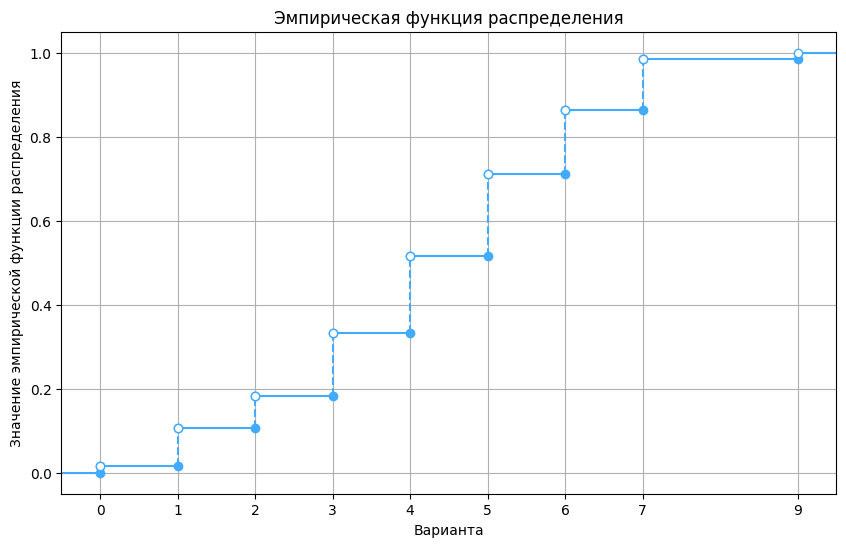

In [2532]:
plt.figure(figsize=(10, 6))

plt.plot([-1, frequency_table['Варианта'].iloc[0]], [0, 0], '#42aaff', linestyle='-', marker='o')
plt.plot(-1, 0, 'wo', markeredgecolor='#42aaff')

for i in range(1, len(frequency_table)):
    plt.plot([frequency_table['Варианта'].iloc[i-1], frequency_table['Варианта'].iloc[i]], 
             [frequency_table['Значение эмпирической функции распределения'].iloc[i-1], frequency_table['Значение эмпирической функции распределения'].iloc[i-1]], '#42aaff', linestyle='-', marker='o')
    plt.plot([frequency_table['Варианта'].iloc[i], frequency_table['Варианта'].iloc[i]], 
             [frequency_table['Значение эмпирической функции распределения'].iloc[i-1], frequency_table['Значение эмпирической функции распределения'].iloc[i]], '#42aaff', linestyle='--')
    plt.plot(frequency_table['Варианта'].iloc[i-1], frequency_table['Значение эмпирической функции распределения'].iloc[i-1], 
             'wo', markeredgecolor='#42aaff')

plt.plot([frequency_table['Варианта'].iloc[-1], 10], [1, 1],  '#42aaff', linestyle='-')
plt.plot(frequency_table['Варианта'].iloc[-1], frequency_table['Значение эмпирической функции распределения'].iloc[-1], 'wo', markeredgecolor='#42aaff')
plt.plot(10, 1, 'wo', markeredgecolor='#42aaff')
plt.xlim(-0.5, 9.5)
plt.xticks(frequency_table['Варианта'])
plt.title("Эмпирическая функция распределения")
plt.xlabel("Варианта")
plt.ylabel("Значение эмпирической функции распределения")
plt.grid(True)
plt.show()

#### <font color='42aaff'> 4) Вычислить начальные и центральные эмпирические моменты до 4-го порядка </font>
Для нахождения эмпирических моментов нам понадобятся относительные частоты $w_i$ вариант. Найдем их по формуле:
$$w_i = \frac{N_i}{N}$$

In [2533]:
frequency_table['Относительная частота'] = frequency_table['Частота'] / frequency_table['Частота'].sum()
frequency_table.columns = ['Варианта', 'Частота', 'Значение эмпирической функции распределения', 'Относительная частота']
display(frequency_table[['Варианта', 'Относительная частота']].style.hide(axis="index"))

Варианта,Относительная частота
0,0.015152
1,0.090909
2,0.075758
3,0.151515
4,0.181818
5,0.196970
6,0.151515
7,0.121212
9,0.015152


Найдем начальные эмпирические моменты, которые описывают свойства распределения относительно начала координат, по формуле:
$$\nu_𝑘=\mathbb{E}[𝑋^𝑘 ]=\sum_{𝑖=1}^𝑛 𝑤_𝑖 \cdot (𝑥_𝑖)^k,\quad \text{где \,$k$ -- порядок \,момента}$$

In [2534]:
moments_table = pd.DataFrame({
    'Порядок': [1, 2, 3, 4],
    'Начальный момент': [
        sum(frequency_table['Относительная частота'] * frequency_table['Варианта']),
        sum(frequency_table['Относительная частота'] * (frequency_table['Варианта'] ** 2)),
        sum(frequency_table['Относительная частота'] * (frequency_table['Варианта'] ** 3)),
        sum(frequency_table['Относительная частота'] * (frequency_table['Варианта'] ** 4)),
    ]
})
display(moments_table.style.hide(axis="index"))

Порядок,Начальный момент
1,4.303030
2,22.212121
3,126.393939
4,770.030303


Начальный момент первого порядка характеризует среднее значение (математическое ожидание):

In [2535]:
mean_value = moments_table['Начальный момент'][0]
display(Markdown(f"""Среднее значение (математическое ожидание): {mean_value}"""))

Среднее значение (математическое ожидание): 4.303030303030304

Найдем центральные эмпирические моменты, которые описывают свойства распределения относительно среднего значения (математического ожидания), по формуле:
$$\mu_𝑘=\mathbb{E}[(𝑋 - \mathbb{E}X)^𝑘]=\sum_{𝑖=1}^𝑛 𝑤_𝑖 \cdot (𝑥_𝑖 - \mathbb{E}X)^k,\quad \text{где \,$k$ -- порядок \,момента}$$

In [2536]:
moments_table['Центральный момент'] = [
        sum(frequency_table['Относительная частота'] * (frequency_table['Варианта'] - mean_value)),
        sum(frequency_table['Относительная частота'] * ((frequency_table['Варианта'] - mean_value) ** 2)),
        sum(frequency_table['Относительная частота'] * ((frequency_table['Варианта'] - mean_value) ** 3)),
        sum(frequency_table['Относительная частота'] * ((frequency_table['Варианта'] - mean_value) ** 4)),
    ]
display(moments_table[['Порядок', 'Центральный момент']].style.hide(axis="index"))

Порядок,Центральный момент
1,-0.000000
2,3.696051
3,-0.993934
4,33.675096


Центральный момент второго порядка характеризует дисперсию $\sigma^2$:

In [2537]:
variance = moments_table['Центральный момент'][1]
display(Markdown(f"""Дисперсия: {variance}"""))

Дисперсия: 3.6960514233241506

#### <font color='42aaff'> 5) Найти моду, медиану, коэффициенты асимметрии и эксцесса </font>

Мода - значение, которое встречается наиболее часто в наборе данных. Найдем ее через функцию pandas mode() и возьмем первую моду mode()[0]

In [2538]:
mode_value = df['Элемент выборки'].mode()[0]
display(Markdown(f"""Мода: {mode_value}"""))

Мода: 5

Медиана — это значение, которое делит упорядоченный набор данных на две равные части. Найдем ее через функцию pandas median()

In [2539]:
median_value = df['Элемент выборки'].median()
display(Markdown(f"""Медиана: {median_value}"""))

Медиана: 4.0

Коэффициент асимметрии — это мера асимметрии распределения относительно его среднего. Найдем его по формуле:
$$ A_S = \frac{\mu_3}{\sigma^{3}} = \frac{\mu_3}{\mu_2^{3/2}} $$

In [2540]:
skewness = moments_table['Центральный момент'][2] / (variance ** (3/2))
display(Markdown(f"""Коэффициент асимметрии: {skewness}"""))

Коэффициент асимметрии: -0.1398783383873522

Коэффициент эксцесса — это мера "остроты" или "плоскости" распределения по сравнению с нормальным распределением. Найдем его по формуле:
$$\gamma_2 = \frac{\mu_4}{\sigma^4} - 3 = \frac{\mu_4}{\mu_2^2} - 3 $$

In [2541]:
kurtosis_value = moments_table['Центральный момент'][3] / (variance ** 2) - 3
display(Markdown(f"""Коэффициент эксцесса: {kurtosis_value}"""))

Коэффициент эксцесса: -0.5349097334207786

#### <font color='42aaff'> 6) Сделать выводы и сформулировать гипотезы о распределении генеральной совокупности из которой извлечена выборка, оценить параметры этого распределения </font>

Генеральная совокупность скорее всего описывается не нормальным распределением так как:
1) Полигон ряда слишком "плоский"
2) Коэффициенты ассиметрии и эксцесса малы, но недостаточно близки к 0

Предположим что генеральная совокупность описывается Пуассоновским распределением. Произведем оценку неизвестного параметра $\lambda$ методом максимального правдоподобия:
$$P(X_i = x_i) = \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}$$
$$L(\lambda) = \prod_{i=1}^n \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}$$
$$l(\lambda) = \ln L(\lambda) = \sum_{i=1}^n \left( x_i \ln \lambda - \lambda - \ln(x_i!) \right)$$
$$\frac{d}{d\lambda} l(\lambda) = \sum_{i=1}^n \left( \frac{x_i}{\lambda} - 1 \right) = 0$$
$$\frac{1}{n} \sum_{i=1}^n \frac{x_i}{\lambda} - 1 = 0$$
$$\frac{1}{n} \sum_{i=1}^n x_i = \lambda$$
$$\hat{\lambda} = \frac{1}{n} \sum_{i=1}^n x_i$$

Получили, что параметр $\lambda$ равен математическому ожиданию. Визуализируем полученную гипотезу

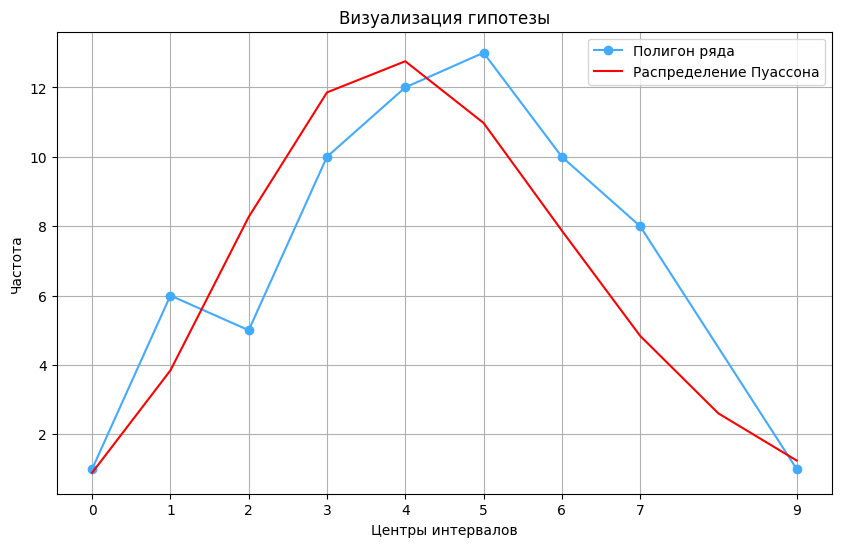

In [2542]:
import numpy as np
from scipy.stats import poisson

lambda_param = mean_value
N = len(flat_data)

plt.figure(figsize=(10, 6))

plt.plot(frequency_table['Варианта'], frequency_table['Частота'], marker="o", color="#42aaff", label="Полигон ряда")

x = np.linspace(min_value, max_value, 10)
plt.plot(x, poisson.pmf(x, lambda_param) * N, 'red', label="Распределение Пуассона")

plt.title("Визуализация гипотезы")
plt.xlabel("Центры интервалов")
plt.ylabel("Частота")
plt.grid(True)
plt.legend()

plt.xticks(frequency_table['Варианта'])

plt.show()

Из визуализации видно, что распределенние Пуассона хорошо описывает наш полигон ряда, но присутвует небольшая "смещенность". Можем сделать вывод, что наша гипотеза верна

## Выборка B

##### <font color='42aaff'>1) Указать максимальный и минимальный элементы выборки, найти размах выборки</font>

Создадим массив с исходными данными, преобразуем его в одномерный и создадим DataFrame. Найдем максимальное и минимальное значения выборки.

In [2543]:
data = [
    [95, 96, 103, 89, 72, 105, 85, 85, 91, 101, 82, 91],
    [80, 85, 91, 87, 101, 94, 98, 85, 82, 94, 86, 72],
    [89, 83, 100, 86, 85, 95, 95, 83, 87, 92, 92, 79],
    [93, 88, 77, 92, 92, 103, 85, 90, 83, 86, 104, 104],
    [85, 85, 80, 95, 91, 93, 70, 83, 93, 95, 95, 78],
    [111, 95, 94, 84, 64, 87, 85, 87, 87, 81, 82, 97],
    [101, 86, 89, 80, 88, 85, 93, 79, 95, 90, 107, 93],
    [96, 83, 88, 91, 95, 94, 88, 80, 96, 93, 77, 71],
    [88, 97, 90, 86, 93, 91, 98, 95, 83, 84, 91, 99],
    [109, 80, 95, 87, 89, 85, 87, 72, 77, 90, 97, 87],
    [95, 91, 88, 91, 81, 88, 78, 75, 80, 97, 95, 83],
    [91, 78, 87, 92, 103, 77, 101, 66, 71, 90, 105, 76],
    [97, 75, 95, 88, 84, 96, 79, 89, 94, 100, 87, 100],
    [92, 100, 79, 96, 104, 84, 89, 82, 93, 92, 85, 80],
    [104, 87, 90, 85, 89, 83, 84, 98, 81, 97, 86, 81],
    [96, 82, 102, 73, 100, 81, 86, 84, 86, 88, 90, 94],
    [81, 99, 100, 81, 95, 88, 90, 87, 97, 90, 100, 94],
    [88, 85, 95, 74, 85, 88, 78, 97, 74]
]


flat_data = [item for sublist in data for item in sublist]
df = pd.DataFrame(flat_data, columns=['Элемент выборки'])

max_value = df['Элемент выборки'].max()
min_value = df['Элемент выборки'].min()
range_value = max_value - min_value

display(Markdown(f"""Максимальное значение: {max_value}  
Минимальное значение: {min_value}  
Размах: {range_value}"""))

Максимальное значение: 111  
Минимальное значение: 64  
Размах: 47

##### <font color='42aaff'>2) Определить оптимальное количество интервалов группировки и длину интервала группировки</font>

Воспользуемся эмпирическим правилом Стерджесса для определения оптимального количества интервалов:
$$n = 1 + 3.222\,\log_{10}{N}$$
Длину интеравала вычислим как:
$$\text{Длина интервала} = \frac{\text{max(data)} - \text{min(data)}}{n}$$

In [2544]:
import math

N = len(flat_data)
n = round(1 + 3.322 * math.log10(N))
interval_length = (max_value - min_value) / n

display(Markdown(f"""Оптимальное количество интервалов: {n}  
Длина интервала: {interval_length}"""))

Оптимальное количество интервалов: 9  
Длина интервала: 5.222222222222222

##### <font color='42aaff'>3) Построить интервальный ряд и гистограмму, а также полигон ряда</font>

Для построения интервального ряда выполним несколько операций:
1) Создадим массив границ интервалов
2) Каждому элементу выборки присвоим номер интервала с помощью функции pandas cut() с флагом include_lowest=True для включения минимального значения в первый интервал
3) Рассчитаем частоты для каждого интервала аналогично тому, как это было сделано для выборки А

Также добавим значения центров интервалов для использования в последующем

In [2545]:
bins = [min_value + i * interval_length for i in range(n + 1)]
df['Интервал'] = pd.cut(df['Элемент выборки'], bins=bins, right=True, include_lowest=True)

frequency_table = df['Интервал'].value_counts().sort_index().reset_index()
frequency_table.columns = ['Интервал', 'Частота']

frequency_table['Центр интервала'] = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
frequency_table = frequency_table[['Интервал', 'Центр интервала', 'Частота']]

display(frequency_table.style.hide(axis="index"))

Интервал,Центр интервала,Частота
"(63.999, 69.222]",66.611111,2
"(69.222, 74.444]",71.833333,9
"(74.444, 79.667]",77.055556,15
"(79.667, 84.889]",82.277778,33
"(84.889, 90.111]",87.500000,63
"(90.111, 95.333]",92.722222,48
"(95.333, 100.556]",97.944444,26
"(100.556, 105.778]",103.166667,14
"(105.778, 111.0]",108.388889,3


Построим гистограмму на основе интервальных частот и границах интервалов

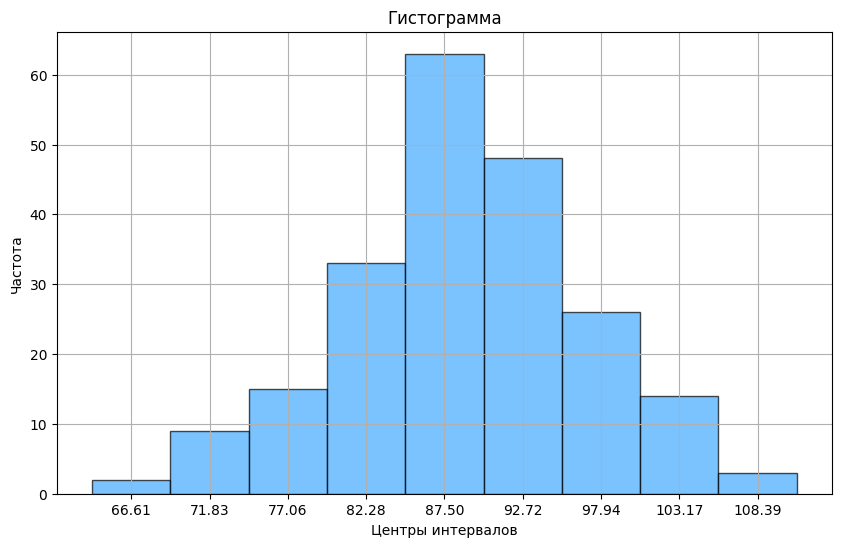

In [2546]:
plt.figure(figsize=(10, 6))

for i in range(len(bins) - 1):
    plt.bar(frequency_table['Центр интервала'][i], frequency_table['Частота'][i], 
            width=interval_length, color="#42aaff", edgecolor="black", alpha=0.7)

plt.title("Гистограмма")
plt.xlabel("Центры интервалов")
plt.ylabel("Частота")
plt.grid(True)

plt.xticks(frequency_table['Центр интервала'].round(2))

plt.show()

Построим полигон ряда на основе интервальных частот и центрах интервалов

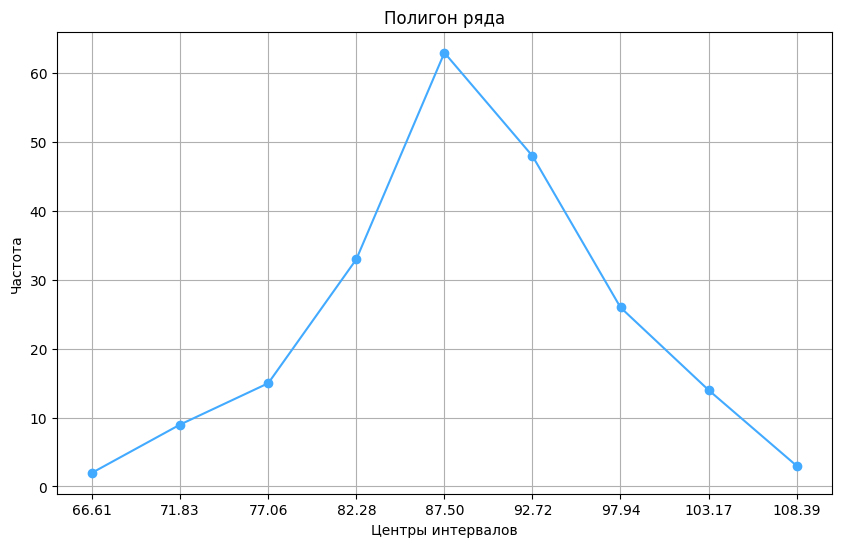

In [2547]:
plt.figure(figsize=(10, 6))

plt.plot(frequency_table['Центр интервала'], frequency_table['Частота'], marker="o", color="#42aaff", linestyle='-')

plt.title("Полигон ряда")
plt.xlabel("Центры интервалов")
plt.ylabel("Частота")
plt.grid(True)

plt.xticks(frequency_table['Центр интервала'].round(2))

plt.show()

##### <font color='42aaff'>4) Записать эмпирическую функцию распределения и построить её график, построить кумуляту</font>

Также как и для выборки А найдем значения эмпирической функции распределения

In [2548]:
frequency_table['Значение эмпирической функции распределения'] = frequency_table['Частота'].cumsum() / frequency_table['Частота'].sum()
frequency_table.columns = ['Интервал', 'Центр интервала', 'Частота', 'Значение эмпирической функции распределения']
display(frequency_table[['Интервал', 'Центр интервала', 'Значение эмпирической функции распределения']].style.hide(axis="index"))

Интервал,Центр интервала,Значение эмпирической функции распределения
"(63.999, 69.222]",66.611111,0.009390
"(69.222, 74.444]",71.833333,0.051643
"(74.444, 79.667]",77.055556,0.122066
"(79.667, 84.889]",82.277778,0.276995
"(84.889, 90.111]",87.500000,0.572770
"(90.111, 95.333]",92.722222,0.798122
"(95.333, 100.556]",97.944444,0.920188
"(100.556, 105.778]",103.166667,0.985915
"(105.778, 111.0]",108.388889,1.000000


Запишем получившеюся эмпирическую функцию распределения

In [2549]:
latex_code = r"F(x) = \begin{cases} "

latex_code += f"0, & x \\leq {bins[0]:.3f}, \\\\ "

for i in range(len(frequency_table) - 1):
    start = bins[i]
    end = bins[i + 1]
    value = frequency_table['Значение эмпирической функции распределения'].iloc[i]
    latex_code += f"{value:.6f}, & {start:.3f} < x \\leq {end:.3f}, \\\\ "

latex_code += f"1, & x > {bins[-2]:.3f}. "

latex_code += r"\end{cases}"

display(Markdown(f"$$ {latex_code} $$"))

$$ F(x) = \begin{cases} 0, & x \leq 64.000, \\ 0.009390, & 64.000 < x \leq 69.222, \\ 0.051643, & 69.222 < x \leq 74.444, \\ 0.122066, & 74.444 < x \leq 79.667, \\ 0.276995, & 79.667 < x \leq 84.889, \\ 0.572770, & 84.889 < x \leq 90.111, \\ 0.798122, & 90.111 < x \leq 95.333, \\ 0.920188, & 95.333 < x \leq 100.556, \\ 0.985915, & 100.556 < x \leq 105.778, \\ 1, & x > 105.778. \end{cases} $$

Построим график эмпирической функции распределения 

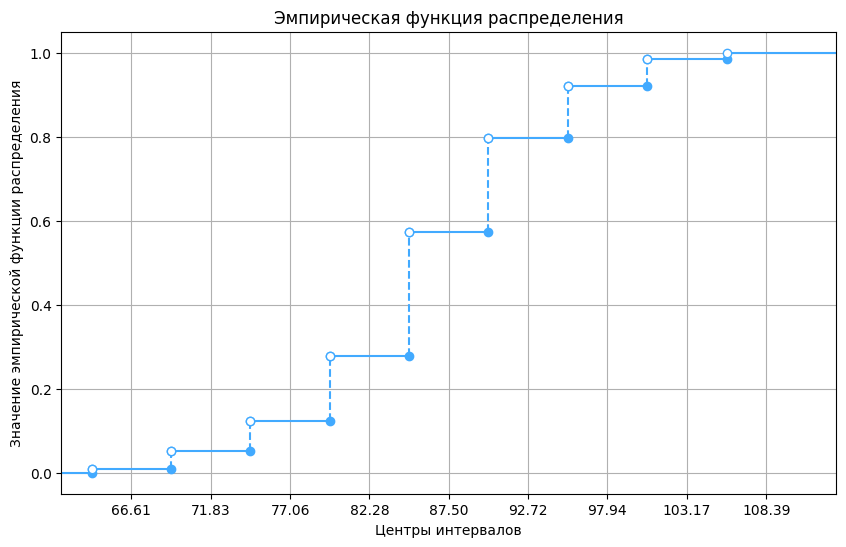

In [2550]:
plt.figure(figsize=(10, 6))

plt.plot([-1, frequency_table['Интервал'].iloc[0].left], [0, 0], '#42aaff', linestyle='-', marker='o')
plt.plot(-1, 0, 'wo', markeredgecolor='#42aaff')

for i in range(1, len(frequency_table)):
    left_edge = frequency_table['Интервал'].iloc[i-1].left
    right_edge = frequency_table['Интервал'].iloc[i].left
    plt.plot([left_edge, right_edge], 
             [frequency_table['Значение эмпирической функции распределения'].iloc[i-1], frequency_table['Значение эмпирической функции распределения'].iloc[i-1]], '#42aaff', linestyle='-', marker='o')
    plt.plot([right_edge, right_edge], 
             [frequency_table['Значение эмпирической функции распределения'].iloc[i-1], frequency_table['Значение эмпирической функции распределения'].iloc[i]], '#42aaff', linestyle='--')
    plt.plot(left_edge, frequency_table['Значение эмпирической функции распределения'].iloc[i-1], 'wo', markeredgecolor='#42aaff')

plt.plot([frequency_table['Интервал'].iloc[-1].left, max_value + interval_length], [1, 1], '#42aaff', linestyle='-')
plt.plot(frequency_table['Интервал'].iloc[-1].left, 1, 'wo', markeredgecolor='#42aaff')

plt.xticks(frequency_table['Центр интервала'].round(2))

plt.xlim(min_value - interval_length//2, max_value + interval_length//2)
plt.title("Эмпирическая функция распределения")
plt.xlabel("Центры интервалов")
plt.ylabel("Значение эмпирической функции распределения")
plt.grid(True)
plt.show()

Для построения кумуляты нам потребуются значения накопленной частоты для каждого интервала:

In [2551]:
frequency_table['Накопленная частота'] = frequency_table['Частота'].cumsum()
display(frequency_table[['Интервал', 'Центр интервала', 'Накопленная частота']].style.hide(axis="index"))

Интервал,Центр интервала,Накопленная частота
"(63.999, 69.222]",66.611111,2
"(69.222, 74.444]",71.833333,11
"(74.444, 79.667]",77.055556,26
"(79.667, 84.889]",82.277778,59
"(84.889, 90.111]",87.500000,122
"(90.111, 95.333]",92.722222,170
"(95.333, 100.556]",97.944444,196
"(100.556, 105.778]",103.166667,210
"(105.778, 111.0]",108.388889,213


Построим график кумуляты

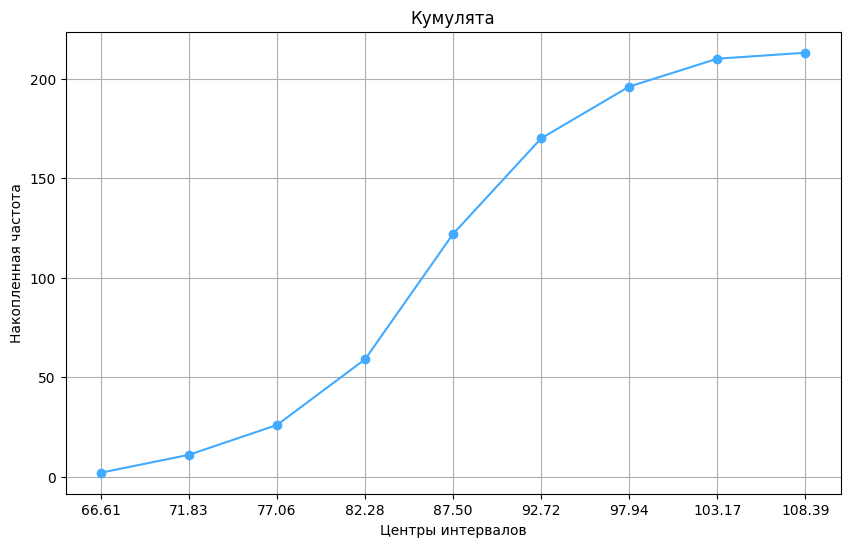

In [2552]:
plt.figure(figsize=(10, 6))

plt.plot(frequency_table['Центр интервала'], frequency_table['Накопленная частота'], marker='o', color='#42aaff')

plt.title("Кумулята")
plt.xlabel("Центры интервалов")
plt.ylabel("Накопленная частота")
plt.xticks(frequency_table['Центр интервала'].round(2))
plt.grid(True)
plt.show()

##### <font color='42aaff'>5) Вычислить начальные и центральные эмпирические моменты до 4-го порядка</font>

Предварительно рассчитаем относительные интервальные частоты:

In [2553]:
frequency_table['Относительная частота'] = frequency_table['Частота'] / frequency_table['Частота'].sum()
display(frequency_table[['Интервал', 'Центр интервала', 'Относительная частота']].style.hide(axis="index"))

Интервал,Центр интервала,Относительная частота
"(63.999, 69.222]",66.611111,0.009390
"(69.222, 74.444]",71.833333,0.042254
"(74.444, 79.667]",77.055556,0.070423
"(79.667, 84.889]",82.277778,0.154930
"(84.889, 90.111]",87.500000,0.295775
"(90.111, 95.333]",92.722222,0.225352
"(95.333, 100.556]",97.944444,0.122066
"(100.556, 105.778]",103.166667,0.065728
"(105.778, 111.0]",108.388889,0.014085


Для вычисления начальных эмпирических моментов воспользуемся такой формулой:
$$\nu_𝑘=\sum_{𝑖=1}^𝑛 𝑤_𝑖 \cdot (\bar{𝑥}_𝑖)^k,\quad \text{где \,$k$ -- порядок \,момента, $\bar{𝑥}_𝑖$ -- среднее значение на интервале}$$

In [2554]:
moments_table = pd.DataFrame({
    'Порядок': [1, 2, 3, 4],
    'Начальный момент': [
        sum(frequency_table['Относительная частота'] * frequency_table['Центр интервала']),
        sum(frequency_table['Относительная частота'] * (frequency_table['Центр интервала'] ** 2)),
        sum(frequency_table['Относительная частота'] * (frequency_table['Центр интервала'] ** 3)),
        sum(frequency_table['Относительная частота'] * (frequency_table['Центр интервала'] ** 4)),
    ]
})
display(moments_table.style.hide(axis="index"))


Порядок,Начальный момент
1,88.872979
2,7964.636252
3,719539.590090
4,65510572.481311


Среднее значение (математическое ожидание) через начальный момент первого порядка:

In [2555]:
mean_value = moments_table['Начальный момент'][0]
display(Markdown(f"""Среднее значение (математическое ожидание): {mean_value}"""))

Среднее значение (математическое ожидание): 88.87297861241522

Для вычисления центральных эмпирических моментов воспользуемся такой формулой:
$$\mu_𝑘=\sum_{𝑖=1}^𝑛 𝑤_𝑖 \cdot (\bar{𝑥}_𝑖 - \mathbb{E}X)^k,\quad \text{где \,$k$ -- порядок \,момента, $\bar{𝑥}_𝑖$ -- среднее значение на интервале}$$

In [2556]:
moments_table['Центральный момент'] = [
        sum(frequency_table['Относительная частота'] * (frequency_table['Центр интервала'] - mean_value)),
        sum(frequency_table['Относительная частота'] * ((frequency_table['Центр интервала'] - mean_value) ** 2)),
        sum(frequency_table['Относительная частота'] * ((frequency_table['Центр интервала'] - mean_value) ** 3)),
        sum(frequency_table['Относительная частота'] * ((frequency_table['Центр интервала'] - mean_value) ** 4)),
    ]
display(moments_table[['Порядок', 'Центральный момент']].style.hide(axis="index"))

Порядок,Центральный момент
1,0.000000
2,66.229924
3,-73.458438
4,13198.733448


Дисперсия $\sigma^2$ через центральный момент второго порядка:

In [2557]:
variance = moments_table['Центральный момент'][1]
display(Markdown(f"""Дисперсия: {variance}"""))

Дисперсия: 66.2299242235616

##### <font color='42aaff'>6) Найти моду (отметить на гистограмме), медиану (отметить на кумуляте), коэффициенты асимметрии и эксцесса</font>

Формула моды для интервального ряда имеет вид:
$$M_O = X_{M_O} + h \frac{N_{M_O} - N_{M_{O-1}}}{(N_{M_O} - N_{M_{O-1}})+(N_{M_O} - N_{M_{O+1}})}$$
где $X_{M_O}$ — левая граница модального интервала, $h$ — длина инттервалов, $N_{M_O}$ — частота модального интервала, $N_{M_{O-1}}$ — частота премодального интервала, $N_{M_{O+1}}$ — частота послемодального интервала

In [2558]:
mode_interval_id = frequency_table['Частота'].idxmax()

mode_interval_left_value = frequency_table['Интервал'][mode_interval_id].left

mode_frequency = frequency_table['Частота'][mode_interval_id]
pre_mode_frequency = frequency_table['Частота'][mode_interval_id - 1]
post_mode_frequency = frequency_table['Частота'][mode_interval_id + 1]

mode_value = mode_interval_left_value + interval_length * (mode_frequency - pre_mode_frequency) / ((mode_frequency - pre_mode_frequency) + (mode_frequency - post_mode_frequency))

display(Markdown(f"""Мода: {mode_value}"""))

Мода: 88.37048148148148

Для нахождения медианы необходимо понять какой интервал является мединанным — первый интервал, накопленная частота $W$ которого превышает половину общей суммы частот. У нас, согласно кумуляте, это интервал (84.889 - 90.111]. Медианное значение интервального ряда найдем по формуле:
$$Me = X_{Me} + \frac{h}{N_{Me}}\left(\frac{N}{2} - W_{Me-1}\right)$$
где $X_{Me}$ — левая граница модального интервала, $N_{Me}$ — частота медианного интервала, $W_{Me-1}$ — накопленная частота предмедианного интервала

In [2559]:
median_interval_id = frequency_table[frequency_table['Накопленная частота'] > N / 2].index[0]

median_interval_left_value = frequency_table['Интервал'][median_interval_id].left
median_frequency = frequency_table['Частота'][median_interval_id]
pre_median_cum_frequency = frequency_table['Накопленная частота'][median_interval_id - 1]

median_value = median_interval_left_value + interval_length / median_frequency * (N / 2 - pre_median_cum_frequency)

display(Markdown(f"""Медиана: {median_value}"""))

Медиана: 88.8263897707231

Теми же способами что и в выборке А найдем коэффициенты ассиметрии и эксцесса:

In [2560]:
skewness = moments_table['Центральный момент'][2] / (variance ** (3/2))
kurtosis_value = moments_table['Центральный момент'][3] / (variance ** 2) - 3
display(Markdown(f"""Коэффициент асимметрии: {skewness}  
                 Коэффициент эксцесса: {kurtosis_value}"""))

Коэффициент асимметрии: -0.13628884267304384  
                 Коэффициент эксцесса: 0.009010768398550972

Отобразим моду на гистограмме

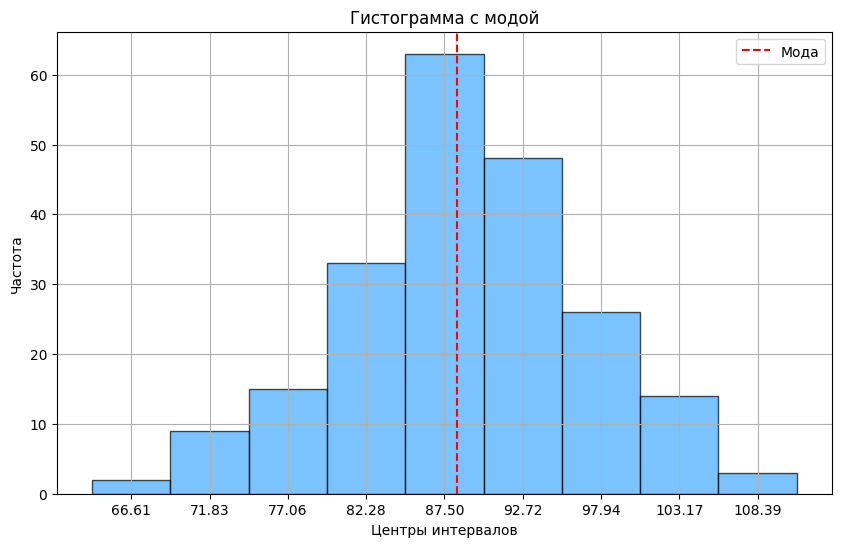

In [2561]:
plt.figure(figsize=(10, 6))

for i in range(len(bins) - 1):
    plt.bar(frequency_table['Центр интервала'][i], frequency_table['Частота'][i], 
            width=interval_length, color="#42aaff", edgecolor="black", alpha=0.7)

# Добавление линии и отметки медианы
plt.axvline(mode_value, color='red', linestyle='--', label='Мода')

plt.title("Гистограмма с модой")
plt.xlabel("Центры интервалов")
plt.ylabel("Частота")
plt.grid(True)
plt.legend()

plt.xticks(frequency_table['Центр интервала'].round(2))

plt.show()

Отобразим медиану на кумуляте

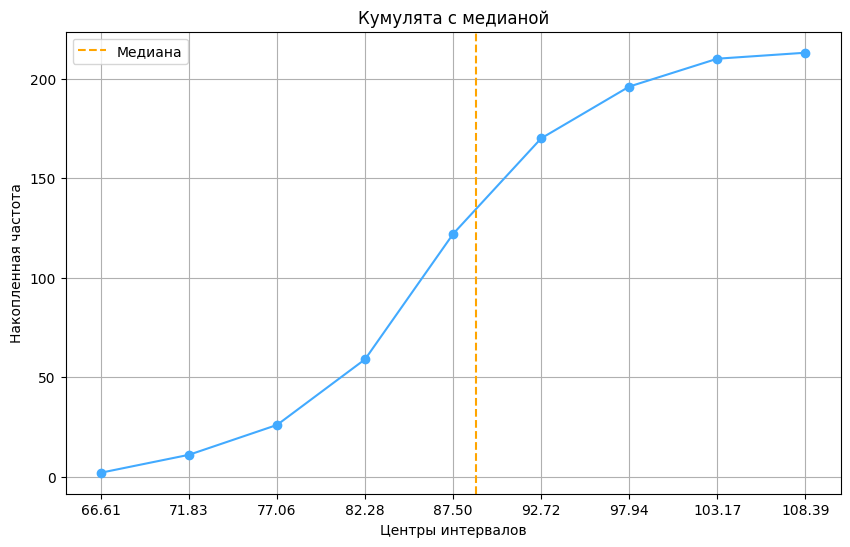

In [2562]:
plt.figure(figsize=(10, 6))

plt.plot(frequency_table['Центр интервала'], frequency_table['Накопленная частота'], marker='o', color='#42aaff')

plt.axvline(median_value, color='orange', linestyle='--', label='Медиана')

plt.title("Кумулята с медианой")
plt.xlabel("Центры интервалов")
plt.ylabel("Накопленная частота")
plt.xticks(frequency_table['Центр интервала'].round(2))
plt.grid(True)
plt.legend()
plt.show()

##### <font color='42aaff'>7) Сделать выводы и сформулировать гипотезы о распределении генеральной совокупности из которой извлечена выборка, оценить параметры этого распределения</font>

Я предполагаю, что генеральная совокупность из которой извлечена данная выборка описывается нормальным распределением по нескольким причинам:
1) Мода и медиана практически идентичны, что характерно для близкого к нормальному распределению
2) Коэффициент эксцесса практически равен 0, коэффициент ассиметрии близок к 0, что опять-таки может говорить о нормальном распределении
Математическое ожидание $\mu$ и СКО $\sigma$ можем оценить методом моментов. Теоритические моменты при этом будут равны эмпирическим моментам, высчитанным в предыдудущих пунктах задания. Получим:
$$\mu = \nu_1$$
$$\sigma = \sqrt{\mu_2}$$

In [2563]:
mu = moments_table['Начальный момент'][0]
sigma = math.sqrt(moments_table['Центральный момент'][1])
display(Markdown(f"""$\mu$ = {mu}  
                 $\sigma$ = {sigma}"""))

$\mu$ = 88.87297861241522  
                 $\sigma$ = 8.13817695946467

Визуализируем нашу гипотезу с помощью функции norm из scipy.stats, которая дает значения нормального распределния для заданных парметров $\mu$ и $\sigma$. Домножим на количество элементов выборки и длинну интервала, чтобы нанести распределение на наш интервальный полигон

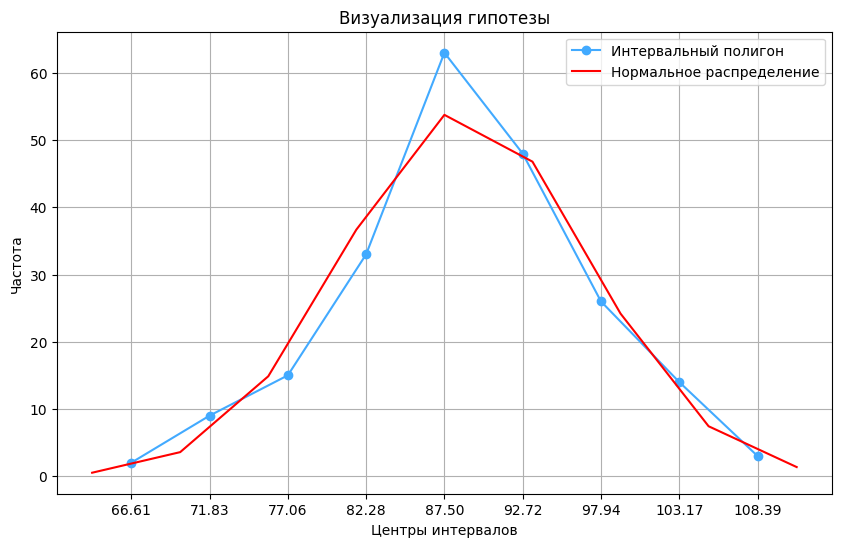

In [2564]:
import numpy as np
from scipy.stats import norm

plt.figure(figsize=(10, 6))

plt.plot(frequency_table['Центр интервала'], frequency_table['Частота'], marker="o", color="#42aaff", label="Интервальный полигон")

x = np.linspace(min_value, max_value, 9)
plt.plot(x, norm.pdf(x, mu, sigma) * N * interval_length, 'red', label="Нормальное распределение")

plt.title("Визуализация гипотезы")
plt.xlabel("Центры интервалов")
plt.ylabel("Частота")
plt.grid(True)
plt.legend()

plt.xticks(frequency_table['Центр интервала'].round(2))

plt.show()

Как видно из визуализации, нормальное распределение очень хорошо соотносится с интервальным полигоном нашей выборки. Будем считать нашу гипотезу верной